# Diffusion in 2 dimensions: diffusion of a dye in water

In [0]:
#libraries
import random  
import matplotlib.pyplot as plt

In [0]:
class Molecule:
  def __init__(self,id):
    self.id=id
    self.pos=0
    self.point=[0,0]
  def setPoint(self,r,c):
    self.point[0]=r
    self.point[1]=c
  def getPoint(self): 
    return self.point
  def getPosition(self):
    return self.pos
  def setPosition(self,pos):
    self.pos=pos
  def getId(self):
    return self.id     

def print_lattice(lattice,row,col): 
  for i in range(row):
    for j in range(col):
      if lattice[i][j]>9 and lattice[i][j]<100:
        print(lattice[i][j],end ='  ')
      elif lattice[i][j]>99:
        print(lattice[i][j],end =' ')  
      else: 
        print(lattice[i][j],end ='   ')       
    print('')  

def init_molecules(lattice,row,col):  # initialize molecules with id at the center of lattice and return list of molecules 
  molecules=[]
  id=1
  for i in range(row):
    for j in range(col):
      if i>=5 and i<col-5 and j>=5 and j<row-5:
        m=Molecule(id)
        lattice[i][j]=m.getId()
        m.setPoint(i,j)
        molecules.append(m)
        id+=1 
  return molecules        

def print_molecules(molecules):
  for m in molecules:
    print(f'Id={m.getId()}, Pos={m.getPosition()}')

def final_position(molecules,lattice,p,nbsteps,row,col): # calculate final positions of molecules 
  for step in range(nbsteps):                            # and molecules update its positions using setPosition
    for m in molecules:  
      r=m.getPoint()[0]
      c=m.getPoint()[1]
      pos=m.getPosition()
      a=random.random()
      if p>a:
          m.setPosition(pos)
          m.setPoint(r,c)
      else:
        if r>0: 
          m.setPoint(r-1,c) 
          m.setPosition(pos+1)
          continue
        if c>0:
          m.setPoint(r,c-1) 
          m.setPosition(pos+1)
          continue
        if r<row-1:
          m.setPoint(r+1,c) 
          m.setPosition(pos+1)
          continue
        if c<col-1:
          m.setPoint(r,c+1) 
          m.setPosition(pos+1)
          continue

def scatter(molecules,nbsteps): #Represent the positions of the molecules in a scattered plot
  x=[]
  y=[]
  for m in molecules:
    x.append(m.getId())
    y.append(m.getPosition())
  plt.title(f'For {nbsteps} steps')  
  plt.xlabel('molecule')
  plt.ylabel('position')
  plt.scatter(x,y,c='red');          

In [0]:
row,col=(20,20)
lattice=[[0 for i in range(col)] for j in range(row)]
molecules=init_molecules(lattice,row,col)
print_lattice(lattice,row,col)

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   1   2   3   4   5   6   7   8   9   10  0   0   0   0   0   
0   0   0   0   0   11  12  13  14  15  16  17  18  19  20  0   0   0   0   0   
0   0   0   0   0   21  22  23  24  25  26  27  28  29  30  0   0   0   0   0   
0   0   0   0   0   31  32  33  34  35  36  37  38  39  40  0   0   0   0   0   
0   0   0   0   0   41  42  43  44  45  46  47  48  49  50  0   0   0   0   0   
0   0   0   0   0   51  52  53  54  55  56  57  58  59  60  0   0   0   0   0   
0   0   0   0   0   61  62  63  64  65  66  67  68  69  70  0   0   0   0   0   
0   0   0   0   0   71  72  

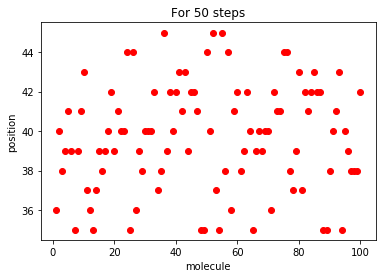

In [0]:
p=0.2 # probability to stay in box
step=50
molecules=init_molecules(lattice,row,col)
final_position(molecules,lattice,p,step,row,col)
scatter(molecules,step)
# print_molecules(molecules) #print id and final position of each molecule

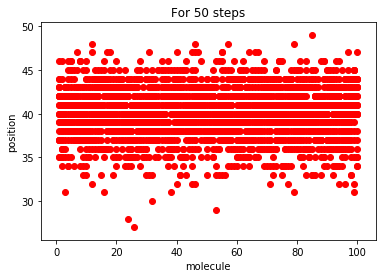

In [0]:
for x in range(25):
  molecules=init_molecules(lattice,row,col)
  final_position(molecules,lattice,p,50,row,col)
  scatter(molecules,50)

##Creating file which contains final position of each molecule for different steps

In [0]:
import pandas as pd 
from google.colab import files 

In [0]:
id=[]
for m in molecules:
  id.append(m.getId())

dict={'Id':id}  
p_stay=0.2 # probability to stay in box
steps=[5,10,20,50,100,200]
pos=[[] for step in steps]

for s in range(len(steps)):
  molecules=init_molecules(lattice,row,col)
  final_position(molecules,lattice,p_stay,steps[s],row,col)
  for m in molecules:
    pos[s].append(m.getPosition())  
  dict[f'Pos for {steps[s]} steps']=pos[s]

df=pd.DataFrame(dict)
filename=f'molecule_p{p}.csv'
df.to_csv(filename,index=0)      

In [0]:
df=pd.read_csv(filename)
# files.download(filename) #download file to computer
df

,Id,Pos for 5 steps,Pos for 10 steps,Pos for 20 steps,Pos for 50 steps,Pos for 100 steps,Pos for 200 steps
0,1,4,10,12,42,82,148
1,2,5,8,18,42,77,164
2,3,4,7,16,36,85,170
3,4,4,9,16,36,84,167
4,5,2,8,12,38,80,164
...,...,...,...,...,...,...,...
95,96,4,8,14,42,79,158
96,97,4,7,17,37,80,155
97,98,4,9,16,39,89,163
98,99,5,6,15,39,76,166
